### 분류(classification)  모델
* Decision Tree
* Logistic Regression
* Naive Bayes
* Support Vector Machine
* Nearest Neighbor(최소근접 알고리즘)

### 결정 트리(Decision Tree)
#### 의사 결정 트리, 의사 결정 나무라고도함, 대표적인 분류 학습 모델, 회귀도 가능, 스무고개와 유사
#### 나무를 거꾸로 뒤 짚어 놓은 모양 : 루트 노드 --> 규칙 노드(중간 노드) --> 리프노드(끝노드) 

#### [1] 불순도(Impurity) : 해당 범주안에 서로 다른 데이터가 얼마나 섞여 있는지를 말한다, 불확실성, 무질서도
#### [2] 엔트로피(Entropy) : 불순도를 수치적으로 나타낸 척도, 엔트로피가 높다는 것은 불순도가 높다, 1 이면 불순도가 최대
#### [3] 정보이득(Information Gain) : 1 - 엔트로피
#### - 결정트리는 분류(구분)한 뒤 각 영역의 순도가 증가, 불순도가 감소하는 방향으로 학습을 진행, 정보이론에서는 정보이득이라고함
#### [4] 지니계수(Gini Coefficient) : 1 - (각 범주별 데이터의 비율의 제곱의 함), 0 이면 최소(끝노드), 1이면 최대

### Iris(붓꽃) 품종 예측하기

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# iris의 품종 : [0:'setosa',1:'versicolor',2:'virginica']
# 붓꽃 데이터 셋트를 로딩
iris = load_iris()
type(iris) # Bunch타입

# x 피쳐만 추출
iris_data =  iris.data
print(iris_data.shape)   # (150, 4)
type(iris_data)          # ndarray
print(iris.feature_names) # sepal : 꽃받침, petal : 꽃잎
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# y 답(label)만 추출
iris_label = iris.target
print(iris_label.shape)  # (150,)
print(iris.target_names) # ['setosa' 'versicolor' 'virginica']

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris_label
print(iris_df['label'].value_counts())  # 50,50,50
iris_df

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']
2    50
1    50
0    50
Name: label, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# train(학습) 데이터와 test(검증) 데이터 세트로 분리 :  80%:20% 비율, 120개(train), 30개(test)
X_train,X_test, y_train,y_test = train_test_split(iris_data,iris_label, test_size=0.2,  # test_size:0.2(20%)
                                                  random_state=11) # random seed 고정
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [4]:
# 학습(train) 수행
dt_clf = DecisionTreeClassifier(random_state=11) # random seed 고정

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [5]:
# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

(array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]),
 array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
        0, 1, 0, 0, 2, 1, 0, 1]))

In [6]:
# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# cl_report = classification_report(y_test,pred)
# print('리포트:\n',cl_report)

정확도: 0.9333


### 결정 트리 모델의 시각화 : 학습 과정을 시각화함

In [7]:
# train(학습) 데이터와 test(검증) 데이터 세트로 분리 :  80%:20% 비율, 120개(train), 30개(test)
X_train,X_test, y_train,y_test = train_test_split(iris_data,iris_label, test_size=0.2,  # test_size:0.2(20%)
                                                  random_state=11) # random seed 고정
X_train.shape,X_test.shape, y_train.shape,y_test.shape

# 학습(train) 수행
dt_clf = DecisionTreeClassifier(random_state=11) # random seed 고정

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [8]:
# fit()으로 학습수행시 생성된 tree를 스크립트 텍스트 파일로 저장
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file ='tree.dot', class_names = iris.target_names,
               feature_names=iris.feature_names,impurity=True,filled=True)

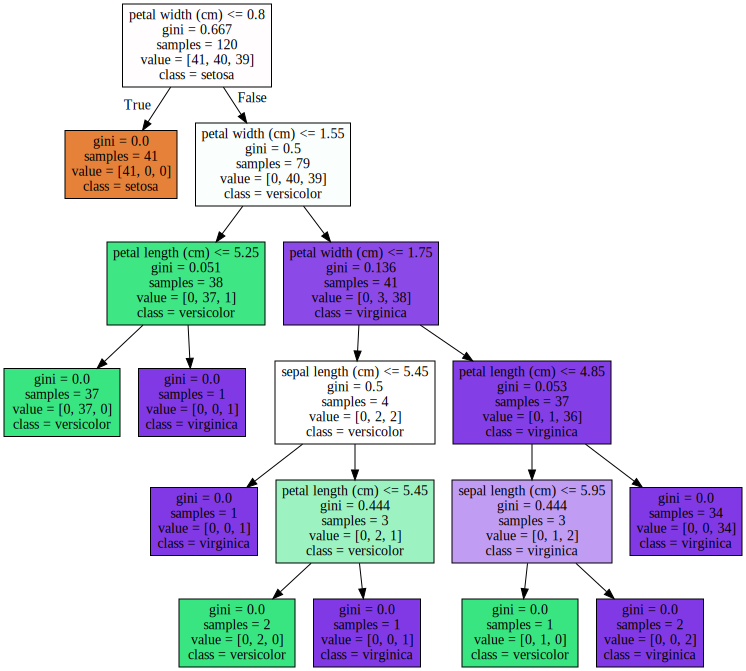

In [9]:
# tree 스크립트 파일을 불러와서 그래프로 출력, 17개 생성 노드가 출력됨
import graphviz

f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
# 지니계수 : 1 -(각 범주별 데이터의 비율의 제곱의 함), 0 이면 leaf node(끝노드)
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setosa

gini = 1 - ((41/120)**2 + (40/120)**2 + (39/120)**2)
print(round(gini,3))  # 0.667

# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
gini = 1 - ((0/79)**2 + (40/79)**2 + (39/79)**2)
print(round(gini,3))  # 0.5

0.667
0.5


feature importance:
[0.025 0.    0.049 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.049
petal width (cm) : 0.926


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


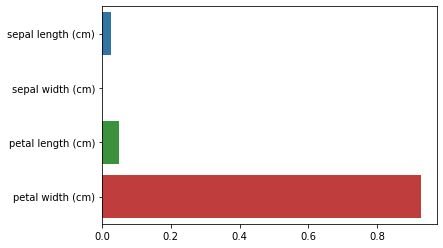

In [11]:
# feauture importance : 결정트리의 규칙노드가 분기 조건으로 사용할 피쳐의 우선 순위
print('feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))
for name, value in zip(iris.feature_names,dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
import seaborn as sns
sns.barplot(x = dt_clf.feature_importances_, y = iris.feature_names)

iris_df.corr() # 상관 계수와 feauture importance는 다른 값임

### 내부 알고리즘 처리 과정 분석

In [12]:
### GINI 계수 함수 구현

def gini(value):
    array_of_values = np.array(value)
    array_of_sum = array_of_values.sum() # 전체 데이터 수
    squared_sum = 0
    for value in array_of_values:
        squared_sum += (value/array_of_sum)**2
    return round(1 - squared_sum,3)
            
print(gini([41, 40, 39])) # 0.667
print(gini([0, 3, 38]))   # 0.136
print(gini([0, 0, 10]))   # 0.0  , 3개중 2개가 0이면 leaf node

0.667
0.136
0.0


In [13]:
# 0번(첫번째) 노드 : 루트 노드, 규칙노드
# petal width (cm) <= 0.8
# gini = 0.667
# samples = 120
# value = [41, 40, 39]
# class = setosa

first_df = pd.DataFrame(data=X_train,columns = iris.feature_names)
first_df['label'] = y_train
first_df.shape  # (120, 5)

print(first_df['label'].value_counts())
value = [41,40,39]
print(gini(value)) # gini = 0.667, 지니 계수가 크므로 자식노드(1번과 2번) 브랜치하기로 결정

# 자식 노드 생성
second_node = first_df[first_df['petal width (cm)'] <= 0.8]  # 자식 노드(1번 노드) 생성
third_node = first_df[first_df['petal width (cm)'] > 0.8]    # 자식 노드(2번 노드) 생성
second_node.shape  # (41,5)
third_node.shape   # (79,5)

0    41
1    40
2    39
Name: label, dtype: int64
0.667


(79, 5)

In [14]:
# 1번(두번째) 노드 : 첫번째 터미널 노드,리프 노드
# gini = 0.0
# samples = 41
# value = [41, 0, 0]
# class = setosa

print(second_node['label'].value_counts())
value =[41,0,0]
print('gini:',gini(value))  # gini : 0.0, 지니계수가 0이므로 leaf노드가 됨, 더이상 브랜치 하지 않음
print('class:',iris.target_names[0]) # class: setosa

# leaf node인 경우 
setosa_result = second_node.copy()
setosa_result

0    41
Name: label, dtype: int64
gini: 0.0
class: setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
3,5.0,3.3,1.4,0.2,0
4,4.7,3.2,1.6,0.2,0
8,5.5,3.5,1.3,0.2,0
12,4.6,3.4,1.4,0.3,0
17,5.0,3.2,1.2,0.2,0
19,5.1,3.8,1.6,0.2,0
25,4.4,3.2,1.3,0.2,0
26,5.4,3.4,1.7,0.2,0
28,5.1,3.7,1.5,0.4,0


In [15]:
# 2번(세번째) 노드 : 규칙 노드
# petal width (cm) <= 1.55
# gini = 0.5
# samples = 79
# value = [0, 40, 39]
# class = versicolor
print(third_node['label'].value_counts())
value = [0, 40, 39]
print('gini:',gini(value))  # gini: 0.5, 지니 계수가 크므로 자식노드(3번과 5번) 브랜치하기로 결정

# 자식 노드 생성
fourth_node = third_node[third_node['petal width (cm)'] <= 1.55] # 자식노드 (3번) 생성
fifth_node = third_node[third_node['petal width (cm)'] > 1.55]   # 자식노드 (5번) 생성
fourth_node.shape # (38, 5)
fifth_node.shape  # (41, 5)

1    40
2    39
Name: label, dtype: int64
gini: 0.5


(41, 5)

In [16]:
# 3번(네번째) 노드 : 규칙 노드
# petal length (cm) <= 5.25
# gini = 0.051
# samples = 38
# value = [0, 37, 1]
# class = versicolor
print(fourth_node['label'].value_counts())
value = [0, 37, 1]
print('gini:',gini(value))  # gini: 0.051, 지니 계수가 작지만 자식노드(4번과 5번) 브랜치하기로 결정

# 자식 노드 생성
sixth_node = fourth_node[fourth_node['petal length (cm)'] <= 5.25]     # 자식노드 (4번) 생성
seventh_node = fourth_node[fourth_node['petal length (cm)'] > 5.25]    # 자식노드 (5번) 생성
sixth_node.shape    # (37, 5)
seventh_node.shape  # (1, 5)

1    37
2     1
Name: label, dtype: int64
gini: 0.051


(1, 5)

In [17]:
# 4번 노드 : 두 번째 터미널 노드, leaf node
# gini = 0.0
# samples = 37
# value = [0, 37, 0]
# class = versicolor

print(sixth_node['label'].value_counts())
value = [0, 37, 0]
print('gini:',gini(value)) # gini: 0.0
print('class:',iris.target_names[1]) # class: versicolor

versicolor_result = sixth_node.copy()
versicolor_result

1    37
Name: label, dtype: int64
gini: 0.0
class: versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
10,5.0,2.0,3.5,1.0,1
13,6.9,3.1,4.9,1.5,1
15,5.1,2.5,3.0,1.1,1
16,6.6,2.9,4.6,1.3,1
22,5.9,3.0,4.2,1.5,1
24,6.7,3.1,4.7,1.5,1
27,6.5,2.8,4.6,1.5,1
36,6.1,2.8,4.7,1.2,1
38,5.6,3.0,4.1,1.3,1
41,5.5,2.6,4.4,1.2,1


In [18]:
# 5번 노드 : 세 번째 터미널 노드, leaf node
# gini = 0.0
# samples = 1
# value = [0, 0, 1]
# class = virginica
print(seventh_node['label'].value_counts())
value = [0, 0, 1]
print('gini:',gini(value)) # gini: 0.0 , leaf node
print('class:',iris.target_names[2]) # class: virginica

virginica_result = seventh_node.copy()
virginica_result

2    1
Name: label, dtype: int64
gini: 0.0
class: virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
30,6.1,2.6,5.6,1.4,2


In [19]:
# 6번 노드 : 규칙 노드
# petal width (cm) <= 1.75
# gini = 0.136
# samples = 41
# value = [0, 3, 38]
# class = virginica
print(fifth_node['label'].value_counts())
value = [0, 3, 38]
print('gini:',gini(value)) # gini: 0.136 지니계수가 작지만 두가지가 혼합 되어 자식 노드(7번과 12번) 생성

# 자식 노드 생성
eight_node = fifth_node[fifth_node['petal width (cm)'] <= 1.75]  # 자식 노드(7번) 생성
ninth_node = fifth_node[fifth_node['petal width (cm)'] > 1.75]  # 자식 노드(12번) 생성
eight_node.shape  # (4, 5)
ninth_node.shape  # (37, 5)

2    38
1     3
Name: label, dtype: int64
gini: 0.136


(37, 5)

In [20]:
# 중간 생략  : 7번 ~ 16번 노드(숙제)

In [21]:
# 최종 학습 분류결과 출력 확인 : 중간 생략 누락된 결과 제외하고
fit_result = pd.concat([setosa_result,versicolor_result,virginica_result],axis = 0)
print(fit_result.shape)
print(fit_result['label'].value_counts())

(79, 5)
0    41
1    37
2     1
Name: label, dtype: int64


### 결정 트리의 파라메터 튜닝 :  학습 시간 및 과적합 제어 

### 과적합(Overfitting)
: 학습 데이터에서는 예측 정확도가 높이 나오는데 학습에서 사용되지 않은 다른 데이터 셋을 사용하여 예측하면 예측 정확도가 떨어지는 경우, 피쳐가 지나치게 많을때도 발생

In [22]:
#  DecisionTreeClassifier(
#     criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=None,
#     random_state=None,
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     class_weight=None,
#     presort=False,
# )

- max_depth : 트리의 최대 깊이,None, 깊이가 너무 깊으면 과적합
- max_features : 최대 피처 갯수, None , 모든 피처를 사용
- max_leaf_nodes : 리프노드의 최대 갯수, None
- min_samples_leaf : 리프 노드가 되기 위한 최소의 샘플데이터 수, 1
- min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합을 제어하는 데 사용

#### [1] max_depth 값 조정 : 트리의 최대 깊이, 깊이가 너무 깊으면 과적합, 정확도에도 영향

In [23]:
# 학습(train) 수행
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = None) #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 1)    #  정확도: 0.6333, 정확도 감소
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 2)    #  정확도: 0.8667, 정확도 감소
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 3)      #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 4)    #  정확도: 0.9333

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


#### [2] min_samples_split : 노드를 분할하기 위한 최소의 샘플 데이터 수, 2, 과적합을 제어하는 데 사용   ,  정확도에도 영향 

In [24]:
# 학습(train) 수행
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 2)      #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 4)      #  정확도: 0.9333
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 41)       #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_split = 42)     #  정확도: 0.866, 정확도 감소

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


#### [3] min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플데이터 수, 1¶

In [25]:
# 학습(train) 수행

# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 1)       #  정확도: 0.9333
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 4)       #  정확도: 0.9333 , 적정값
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 5)       #  정확도: 0.8667 , 정확도가 감소
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 39)        #  정확도:  0.9333 , 적정값
# dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 40)      #  정확도:  0.6333, 정확도가 감소

dt_clf.fit(X_train,y_train)

# 예측(predict) 수행
pred = dt_clf.predict(X_test)
pred,y_test

# 정확도 측정 : accuracy
from sklearn.metrics import accuracy_score, classification_report 

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

정확도: 0.9333


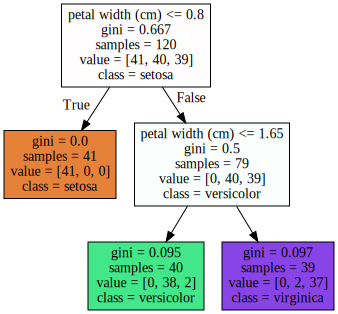

In [26]:
# fit()으로 학습수행시 생성된 tree를 스크립트 텍스트 파일로 저장
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file ='tree.dot', class_names = iris.target_names,
               feature_names=iris.feature_names,impurity=True,filled=True)
f = open('tree.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

### 교차검증(Cross Validation)
#### 테스트 데이터에만 과적합 될 수 있으므로 데이터를 여러개로 나누어 테스트를 여러번 수행하여 평균 정확도를 구함

In [27]:
from sklearn.model_selection import cross_val_score

iris_data = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_data.data , iris_data.target,
                                                test_size = 0.2 , random_state = 11)

dt_clf = DecisionTreeClassifier(random_state=11)

# 학습
dt_clf.fit(X_train,y_train)

# 예측
pred = dt_clf.predict(X_test)

# 정확도  : 1회만 예측한 결과의 정확도
print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 교차 검증(cross validation)
cv_score = cross_val_score(dt_clf,iris_data.data,iris_data.target,  # Estimator,X,Y값
                           scoring='accuracy', cv = 3) # cv = 3, 3개로 쪼개어 검증(predict를 3회 수행)

# 내부적으로 Stratified K-Fold 사용됨, 평가지표를 한개만 구할 수 있어서 StatifiedKFold사용 권장

print('교차 검증 정확도:',cv_score) # [0.98039216 0.92156863 0.97916667]
print('교차 검증 평균 정확도:',np.round(np.mean(cv_score),4)) # 0.9604  : 3회 예측 한 결과의 정확도들의 평균

정확도: 0.9333
교차 검증 정확도: [0.98 0.92 0.98]
교차 검증 평균 정확도: 0.96


### K-Fold 교차 검증
#### : K번 만큼 폴드(Fold)된 각각의 데이터 세트로 학습과 검증을 K번 만큼 반복하여 평균 정확도를 구함

In [28]:
from sklearn.model_selection import KFold
iris = load_iris()
features = iris.data
label = iris.target

features.shape  # (150, 4)
label.shape     # (150,)

dt_clf = DecisionTreeClassifier(random_state=11) # Estimator 생성

In [29]:
# 5개 폴드 세트로 분리
kfold = KFold(n_splits = 5)
cv_accuracy = []
n_iter = 0

for train_index,test_index in kfold.split(features):
    # kfold.split()함수 : X데이터 features를 분리하여 학습/검증용 데이터의 인덱스를 반환
    
    # 150개 데이터
    # k 값(n_splits) : 폴드세트 갯수, 학습:검증  검증 데이터의 비율
    #     2          :   2            75:75      1/2(50%)
    #     3          :   3            100:50     1/3(33%)
    #     4          :   4            112:38     1/4(25%)
    #     5          :   5            120:30     1/5(20%)
    #     6          :   6            125:25     1/6(16.7%)
    
    X_train = features[train_index]
    X_test = features[test_index]
    
    y_train = label[train_index]
    y_test = label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1

    # 반복시 마다 정확도 측정
    accuracy = round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)
    
    print('#',n_iter,'번 폴드 교차검증 정확도:',accuracy,'학습데이터의 크기:',X_train.shape[0],
                                                       '검증데이터의 크기:',X_test.shape[0])
    print('학습 인덱스:',train_index)
    print('검증 인덱스:',test_index)

# K폴드로 반복된 정확도를 합하여 평균 정확도 계산
print('K폴드 교차 검증 평균 정확도:', round(np.mean(cv_accuracy),3)) #  0.92

# 1 번 폴드 교차검증 정확도: 1.0 학습데이터의 크기: 120 검증데이터의 크기: 30
학습 인덱스: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
검증 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
# 2 번 폴드 교차검증 정확도: 0.9667 학습데이터의 크기: 120 검증데이터의 크기: 30
학습 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 

### Stratified K-Fold : 필수 사용!!
#### label 이 지나치게 불균형 분포를 이룰 때 레이블의 분포를 균일하게 폴드시키는 방식
#### 분류모델에서만 가능(회귀는 지원되지 않음)

In [30]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

kfold = KFold(n_splits = 5, shuffle=True)  # shuffle과 Stratified는 성능이 다름
n_iter = 0
for train_index,test_index in kfold.split(features):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n[',n_iter,'번 폴드 세트]')
    print(label_train.value_counts())  # 120개
    print(label_test.value_counts())   # 30개  , 레이블이 불균형 분포를 이룬다    


[ 1 번 폴드 세트]
2    42
0    40
1    38
Name: label, dtype: int64
1    12
0    10
2     8
Name: label, dtype: int64

[ 2 번 폴드 세트]
1    43
2    40
0    37
Name: label, dtype: int64
0    13
2    10
1     7
Name: label, dtype: int64

[ 3 번 폴드 세트]
2    42
0    40
1    38
Name: label, dtype: int64
1    12
0    10
2     8
Name: label, dtype: int64

[ 4 번 폴드 세트]
2    42
0    41
1    37
Name: label, dtype: int64
1    13
0     9
2     8
Name: label, dtype: int64

[ 5 번 폴드 세트]
1    44
0    42
2    34
Name: label, dtype: int64
2    16
0     8
1     6
Name: label, dtype: int64


In [31]:
# StratifiedKFold : 레이릅 분포가 균일하게 분리된다, 정확도 향상
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
n_iter =0

for train_index,test_index in skf.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('\n[',n_iter,'번 폴드 세트]')
    print(label_train.value_counts())  # 120개
    print(label_test.value_counts())   # 30개  , 원본과 같은 비율로 레이블이 균형 분포를 이룬다    



[ 1 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 2 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 3 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 4 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64

[ 5 번 폴드 세트]
2    40
1    40
0    40
Name: label, dtype: int64
2    10
1    10
0    10
Name: label, dtype: int64


In [32]:
# StratifiedKFold 를 사용하여 학습 및 예측 과 정확도 측정 (회귀 모델에서는 사용 불가능)
skf = StratifiedKFold(n_splits=5)
cv_accuracy = []
n_iter =0

for train_index,test_index in skf.split(iris_df,iris_df['label']): # Y 레이블을 반드시 인자로 사용
    X_train = features[train_index]
    X_test = features[test_index]
    
    y_train = label[train_index]
    y_test = label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    
    # 반복시 마다 정확도 측정
    accuracy = round(accuracy_score(y_test,pred),4)
    cv_accuracy.append(accuracy)
    
    print('#',n_iter,'번 폴드 교차검증 정확도:',accuracy,'학습데이터의 크기:',X_train.shape[0],
                                                       '검증데이터의 크기:',X_test.shape[0])
    print('학습 인덱스:',train_index)
    print('검증 인덱스:',test_index)

# StratifiedKFold로 반복된 정확도를 합하여 평균 정확도 계산
print('StratifiedKFold 교차 검증 평균 정확도:', round(np.mean(cv_accuracy),4)) #  0.96

# StratifiedKFold로 레이블의 분포를 균일하게 폴드를 생성하여 학습시키므로 정확도가 향상됨 : 0.92-->0.96

# 1 번 폴드 교차검증 정확도: 0.9667 학습데이터의 크기: 120 검증데이터의 크기: 30
학습 인덱스: [ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
검증 인덱스: [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
# 2 번 폴드 교차검증 정확도: 0.9667 학습데이터의 크기: 120 검증데이터의 크기: 30
학습 인덱스: [  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82

## GridSearchCV
#### : 교차 검증과 파라메터 집합을 만들어 주면 최적의 파라메터 값을 구해줌

In [33]:
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,
                                                random_state=11)
dt_clf = DecisionTreeClassifier(random_state=11)  # Estimator

# 파라메터들을 dict 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [34]:
grid_tree = GridSearchCV(dt_clf, param_grid=parameters,cv=3, refit=True,return_train_score=True)
grid_tree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
          'split0_train_score','split1_train_score','split2_train_score']]

,params,mean_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.6750,0.6750,0.6750
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.6750,0.6750,0.6750
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.9875,0.9500,0.9750
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.9875,0.9500,0.9750
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.9875,0.9625,0.9875
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.9875,0.9625,0.9875


In [35]:
print('GridSearchCV 최적 파라메터:',grid_tree.best_params_)
print('GridSearchCV 최고 정확도:',grid_tree.best_score_)

# GridSearchCV 최적 파라메터: {'max_depth': 3, 'min_samples_split': 2}

GridSearchCV 최적 파라메터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9666666666666667


In [36]:
pred = grid_tree.predict(X_test)
print(accuracy_score(y_test,pred))

# dt_clf = DecisionTreeClassifier(random_state=11, max_depth=3, min_samples_split=2)
# dt_clf.fit(X_train,y_train)
# pred = dt_clf.predict(X_test)
# print(accuracy_score(y_test,pred))

0.9333333333333333


In [37]:
esimator = grid_tree.best_estimator_  # estimator : DecisionTreeClassifier
pred = esimator.predict(X_test)
print(accuracy_score(y_test,pred))

0.9333333333333333
